In [1]:
import pandas as pd
from sqlalchemy import create_engine, func, inspect, select
engine = create_engine('postgresql://postgres:<PASSWORD>@localhost:5432/employee_db')
connection = engine.connect()
!pip install psycopg2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
print(engine.table_names())

['titles', 'employees', 'dept_emp', 'departments', 'salaries', 'dept_manager']


In [3]:
employees_df = pd.read_sql("select * from employees", connection)
employees_df.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [4]:
employees = employees_df.rename(columns={'emp_title_id': 'title_id'})
employees

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [5]:
salaries_df = pd.read_sql("select * from salaries", connection)
salaries_df.fillna("NaN")
salaries_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [6]:
salaries_df["salary"].max()

129492

In [7]:
salaries_df["salary"].min()

40000

In [8]:
title = pd.read_sql("SELECT * FROM titles", connection)
title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [9]:
emp_salaries = salaries_df.merge(employees, on='emp_no')
merged_df = emp_salaries.merge(title, on = 'title_id')
merged_df

,emp_no,salary,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,9/2/1953,Georgi,Facello,M,6/26/1986,Senior Engineer
1,10003,40006,e0003,12/3/1959,Parto,Bamford,M,8/28/1986,Senior Engineer
2,10004,40054,e0003,5/1/1954,Chirstian,Koblick,M,12/1/1986,Senior Engineer
3,10006,40000,e0003,4/20/1953,Anneke,Preusig,F,6/2/1989,Senior Engineer
4,10009,60929,e0003,4/19/1952,Sumant,Peac,F,2/18/1985,Senior Engineer
...,...,...,...,...,...,...,...,...,...
300019,111534,48077,m0001,6/27/1952,Hilary,Kambil,F,1/31/1988,Manager
300020,111692,40000,m0001,10/5/1954,Tonny,Butterworth,F,1/1/1985,Manager
300021,111784,40000,m0001,6/14/1956,Marjo,Giarratana,F,2/12/1988,Manager
300022,111877,53846,m0001,10/18/1962,Xiaobin,Spinelli,F,8/17/1991,Manager


In [10]:
hist = merged_df[['emp_no', 'title', 'salary']]
hist.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10003,Senior Engineer,40006
2,10004,Senior Engineer,40054
3,10006,Senior Engineer,40000
4,10009,Senior Engineer,60929


In [11]:
hist.groupby(['title'])
hist.head()

,emp_no,title,salary
0,10001,Senior Engineer,60117
1,10003,Senior Engineer,40006
2,10004,Senior Engineer,40054
3,10006,Senior Engineer,40000
4,10009,Senior Engineer,60929


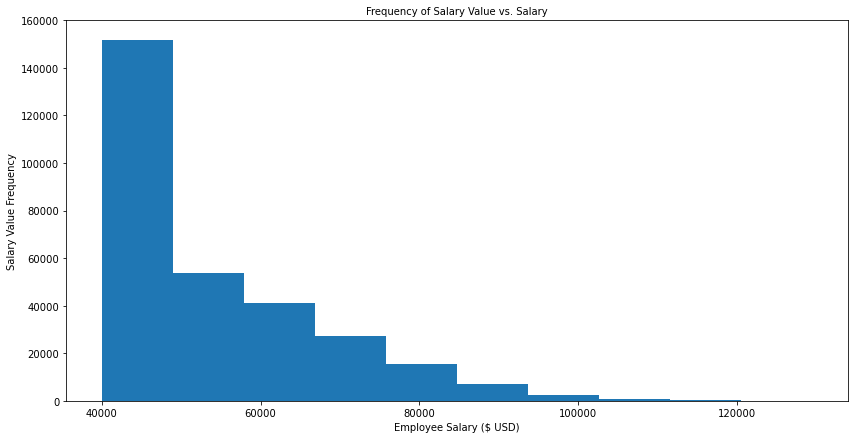

In [12]:
fig=plt.figure(figsize=(14,7))
plt.hist(hist["salary"])
plt.xlabel("Employee Salary ($ USD)", fontsize=10)
plt.ylabel("Salary Value Frequency",fontsize=10)
plt.ylim(0, 160000)
plt.title("Frequency of Salary Value vs. Salary", fontsize=10)
plt.show()

In [13]:
emp_title = hist.groupby(['title'])['salary'].mean()
emp_title

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Staff                 58465.382850
Technique Leader      48582.896092
Name: salary, dtype: float64

<AxesSubplot:xlabel='title'>

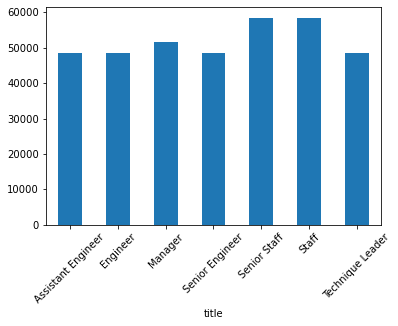

In [14]:
emp_title.plot.bar(rot=45)

In [15]:
epilogue = employees.loc[employees["emp_no"]==499942]
epilogue

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
168736,499942,e0004,1/10/1963,April,Foolsday,F,2/10/1997
